<a href="https://colab.research.google.com/github/Shubham299432/ydata-profiling-report/blob/main/Netflix_Shubham.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

sns.set_style('darkgrid')

In [2]:
!git clone 'https://github.com/HarshvardhanSingh-13/Datasets'

Cloning into 'Datasets'...
remote: Enumerating objects: 311, done.
remote: Counting objects: 100% (69/69), done.
remote: Compressing objects: 100% (62/62), done.
remote: Total 311 (delta 16), reused 0 (delta 0), pack-reused 242 (from 1)
Receiving objects: 100% (311/311), 302.52 MiB | 21.99 MiB/s, done.
Resolving deltas: 100% (130/130), done.
Updating files: 100% (237/237), done.


In [3]:
df = pd.read_csv('/content/netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,Year Added,Month,date_added,release_year,rating,duration,listed_in,description,Source
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021,September,25-Sep-21,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Netflix
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,September,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Netflix
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021,September,24-Sep-21,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,Netflix
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021,September,24-Sep-21,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",Netflix
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021,September,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,Netflix


In [4]:
df.tail()

,show_id,type,title,director,cast,country,Year Added,Month,date_added,release_year,rating,duration,listed_in,description,Source
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019,November,20-Nov-19,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",Netflix
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,2019,July,1-Jul-19,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",Netflix
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019,November,1-Nov-19,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,Netflix
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020,January,11-Jan-20,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",Netflix
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019,March,2-Mar-19,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,Netflix


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   Year Added    8807 non-null   object
 7   Month         8807 non-null   object
 8   date_added    8797 non-null   object
 9   release_year  8807 non-null   int64 
 10  rating        8803 non-null   object
 11  duration      8804 non-null   object
 12  listed_in     8807 non-null   object
 13  description   8807 non-null   object
 14  Source        8807 non-null   object
dtypes: int64(1), object(14)
memory usage: 1.0+ MB


In [6]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [7]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
Year Added,0
Month,0
date_added,10
release_year,0


In [8]:
df['director'] = df['director'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Unknown')

In [9]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,831
Year Added,0
Month,0
date_added,10
release_year,0


In [10]:
mode_country = df['country'].mode()[0]
df['country'] = df['country'].fillna(mode_country)

In [11]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
Year Added,0
Month,0
date_added,10
release_year,0


In [12]:
df.dropna(subset=['date_added','rating'], inplace=True)

In [13]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
Year Added,0
Month,0
date_added,0
release_year,0


In [14]:
df['date_added'] = pd.to_datetime(df['date_added'], format='mixed', dayfirst=False)

In [15]:
df.head()

,show_id,type,title,director,cast,country,Year Added,Month,date_added,release_year,rating,duration,listed_in,description,Source
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021,September,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Netflix
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,September,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Netflix
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021,September,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,Netflix
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,United States,2021,September,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",Netflix
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021,September,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,Netflix


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8793 entries, 0 to 8806
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8793 non-null   object        
 1   type          8793 non-null   object        
 2   title         8793 non-null   object        
 3   director      8793 non-null   object        
 4   cast          8793 non-null   object        
 5   country       8793 non-null   object        
 6   Year Added    8793 non-null   object        
 7   Month         8793 non-null   object        
 8   date_added    8793 non-null   datetime64[ns]
 9   release_year  8793 non-null   int64         
 10  rating        8793 non-null   object        
 11  duration      8790 non-null   object        
 12  listed_in     8793 non-null   object        
 13  description   8793 non-null   object        
 14  Source        8793 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(13)


In [17]:
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

In [18]:
df.head()

,show_id,type,title,director,cast,country,Year Added,Month,date_added,release_year,rating,duration,listed_in,description,Source,year_added,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021,September,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Netflix,2021,9
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,September,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Netflix,2021,9
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021,September,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,Netflix,2021,9
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,United States,2021,September,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",Netflix,2021,9
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021,September,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,Netflix,2021,9


In [19]:
df['type'].value_counts()

,count
type,
Movie,6129
TV Show,2664


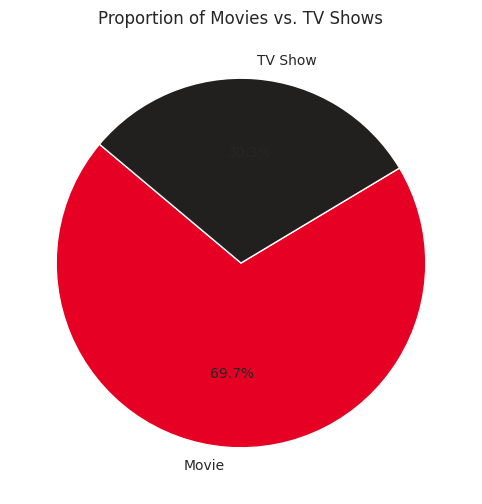

In [20]:
plt.figure(figsize=(8,6))
type_counts = df['type'].value_counts()
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=140, colors=['#e60023', '#221f1f'])
plt.title('Proportion of Movies vs. TV Shows')
plt.show()

<Figure size 1400x800 with 0 Axes>

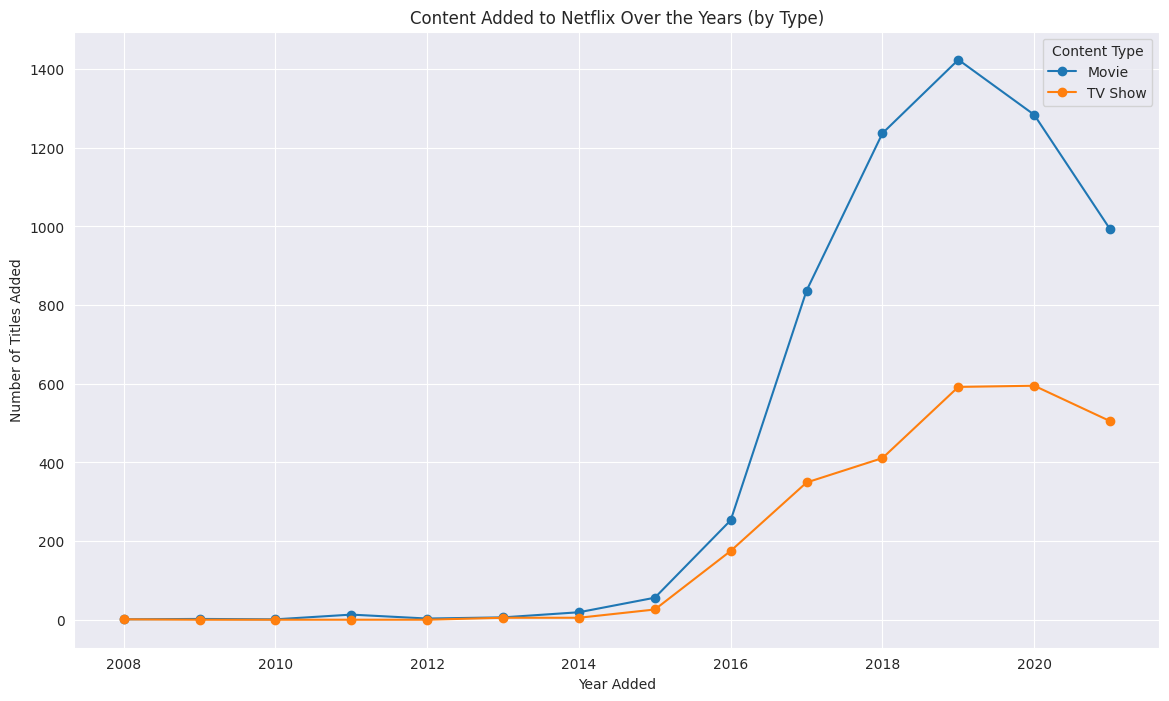

In [21]:
content_over_time = df.groupby(['year_added', 'type']).size().unstack().fillna(0)

plt.figure(figsize=(14,8))
content_over_time.plot(kind = 'line', marker = 'o', figsize=(14,8))
plt.title('Content Added to Netflix Over the Years (by Type)')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles Added')
plt.legend(title='Content Type')
plt.grid(True)
plt.show()

In [27]:
genres = df.assign(genre = df['listed_in'].str.split(', ')).explode('genre')

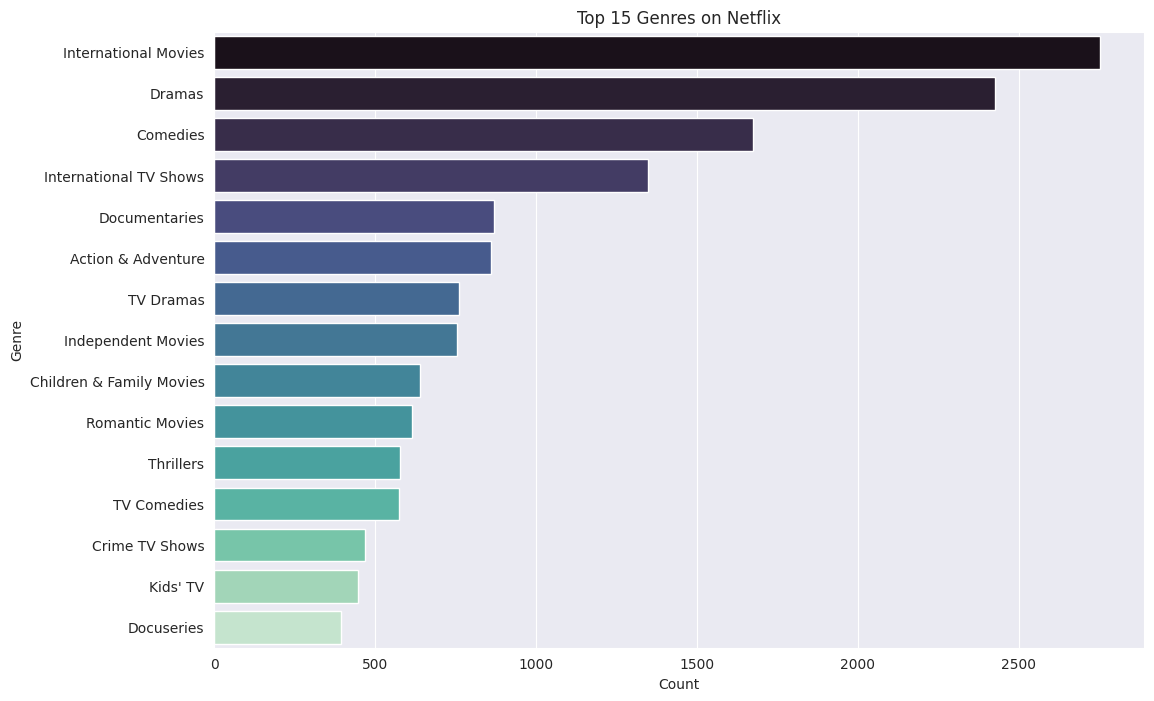

In [28]:
# Get the top 15 genres and their counts
top_genres_counts = genres['genre'].value_counts().reset_index()
top_genres_counts.columns = ['genre', 'count'] # Rename columns for clarity

# Select only the top 15 for plotting
top_genres_counts_plot = top_genres_counts.head(15)

plt.figure(figsize=(12, 8))
sns.barplot(y='genre', x='count', data=top_genres_counts_plot, palette='mako', hue='genre', legend=False)
plt.title('Top 15 Genres on Netflix')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

In [29]:

movies_df = df[df['type'] == 'Movie'].copy()
tv_shows_df = df[df['type'] == 'TV Show'].copy()

In [30]:
tv_shows_df['duration'] = tv_shows_df['duration'].str.replace(' Seasons','').str.replace(' Season','').astype(int)

In [33]:
movies_df['duration'] = movies_df['duration'].str.replace(' min', '', regex=False)
movies_df['duration'] = movies_df['duration'].astype(float)

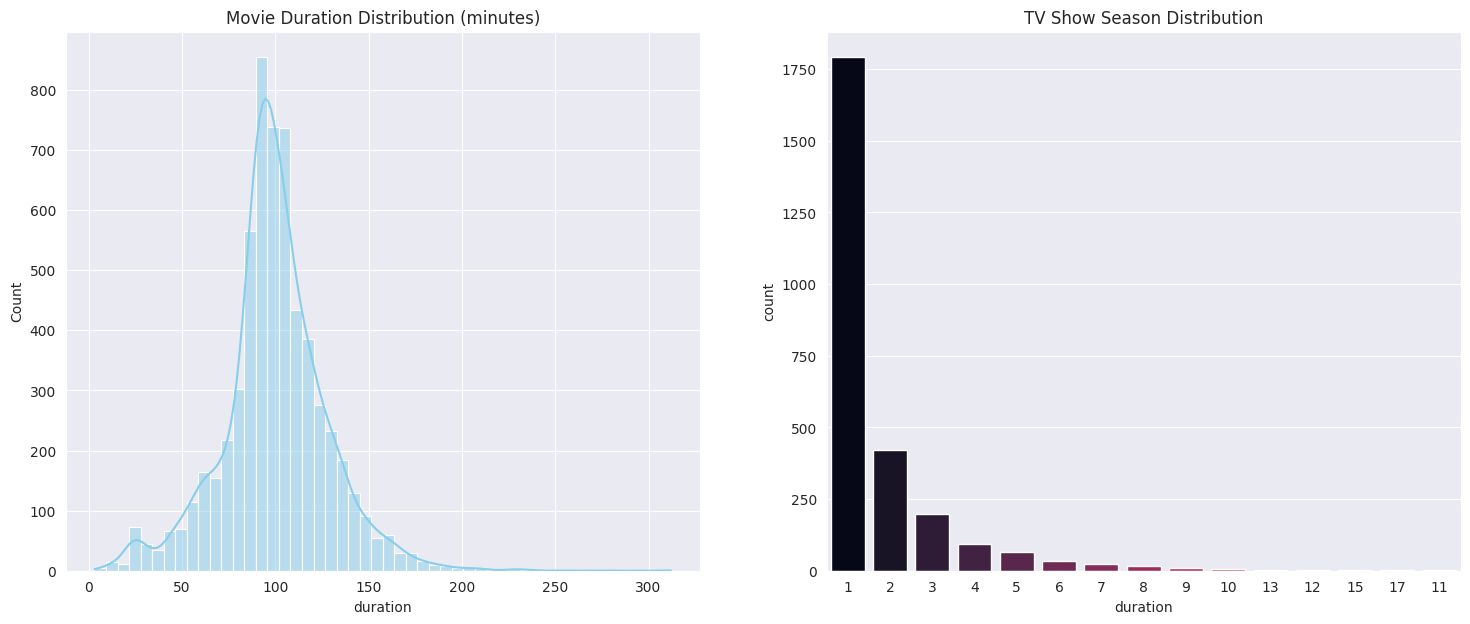

In [34]:
# Plot the distributions
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Movie Duration Distribution
sns.histplot(ax=axes[0], data=movies_df, x='duration', bins=50, kde=True, color='skyblue').set_title('Movie Duration Distribution (minutes)')

# TV Show Season Distribution
sns.countplot(ax=axes[1], x='duration', data=tv_shows_df, palette='rocket', order=tv_shows_df['duration'].value_counts().index, hue='duration', legend=False).set_title('TV Show Season Distribution')

plt.show()

In [35]:
## Handle the mult-country listed
countries = df.assign(country = df['country'].str.split(', ')).explode('country')

In [36]:
# Get the top 15 countries and their counts
top_countries_counts = countries['country'].value_counts().reset_index()
top_countries_counts.columns = ['country', 'count'] # Rename columns for clarity

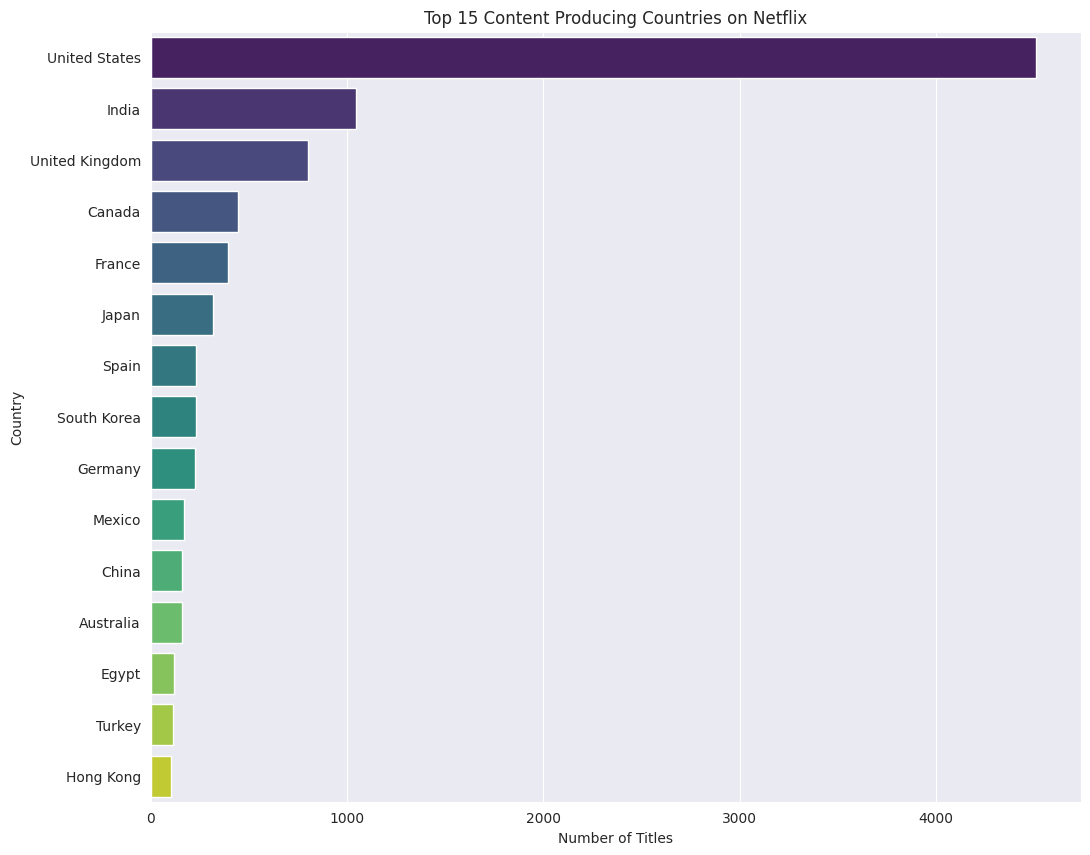

In [37]:
# Select only the top 15 for plotting
top_countries_counts_plot = top_countries_counts.head(15)

plt.figure(figsize=(12, 10))
sns.barplot(y='country', x='count', data=top_countries_counts_plot, palette='viridis', hue='country', legend=False)
plt.title('Top 15 Content Producing Countries on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()

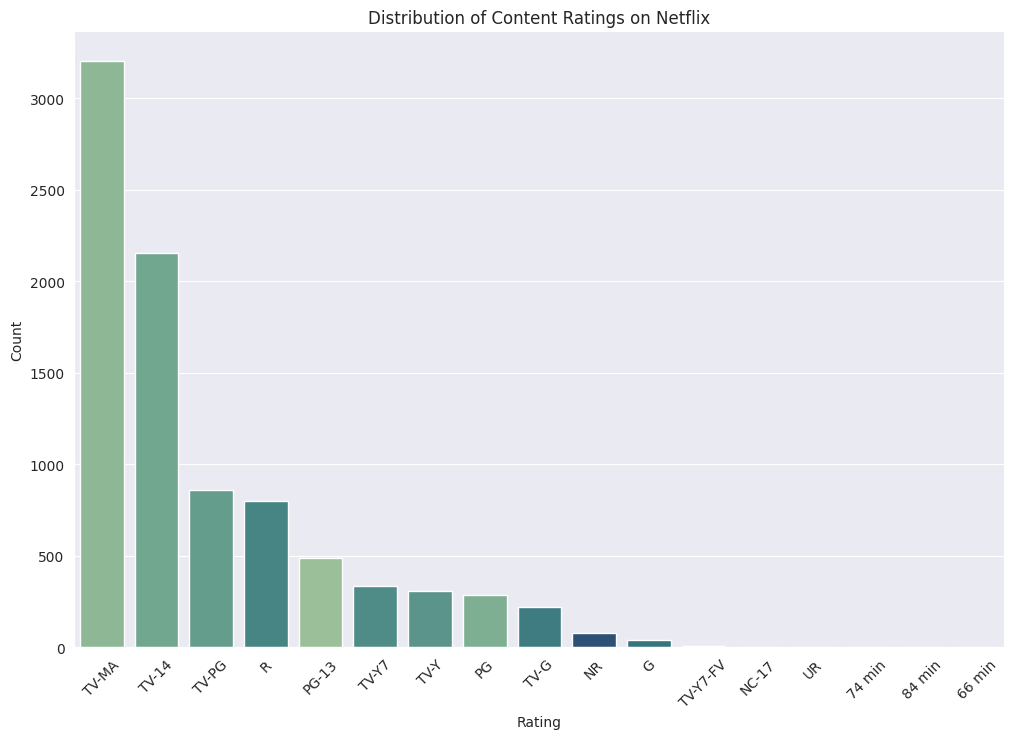

In [38]:
plt.figure(figsize=(12,8))
sns.countplot(x='rating', data=df, order=df['rating'].value_counts().index, palette='crest', hue='rating', legend=False)
plt.title('Distribution of Content Ratings on Netflix')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [39]:
## Creating a column 'age_on_netflix' feature

df['age_on_netflix'] = df['year_added'] - df['release_year']

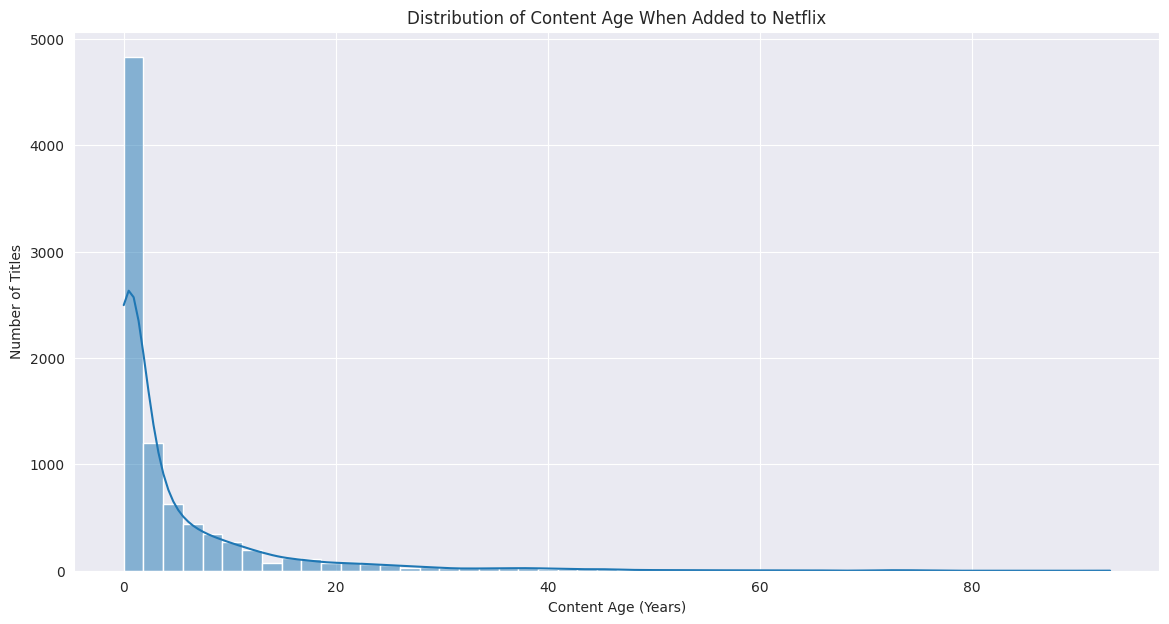

In [40]:
## Filter out any potential errors when added_year is before release_year

content_age = df[df['age_on_netflix'] >= 0]

plt.figure(figsize=(14, 7))
sns.histplot(data=content_age, x='age_on_netflix', bins=50, kde=True)
plt.title('Distribution of Content Age When Added to Netflix')
plt.xlabel('Content Age (Years)')
plt.ylabel('Number of Titles')
plt.show()

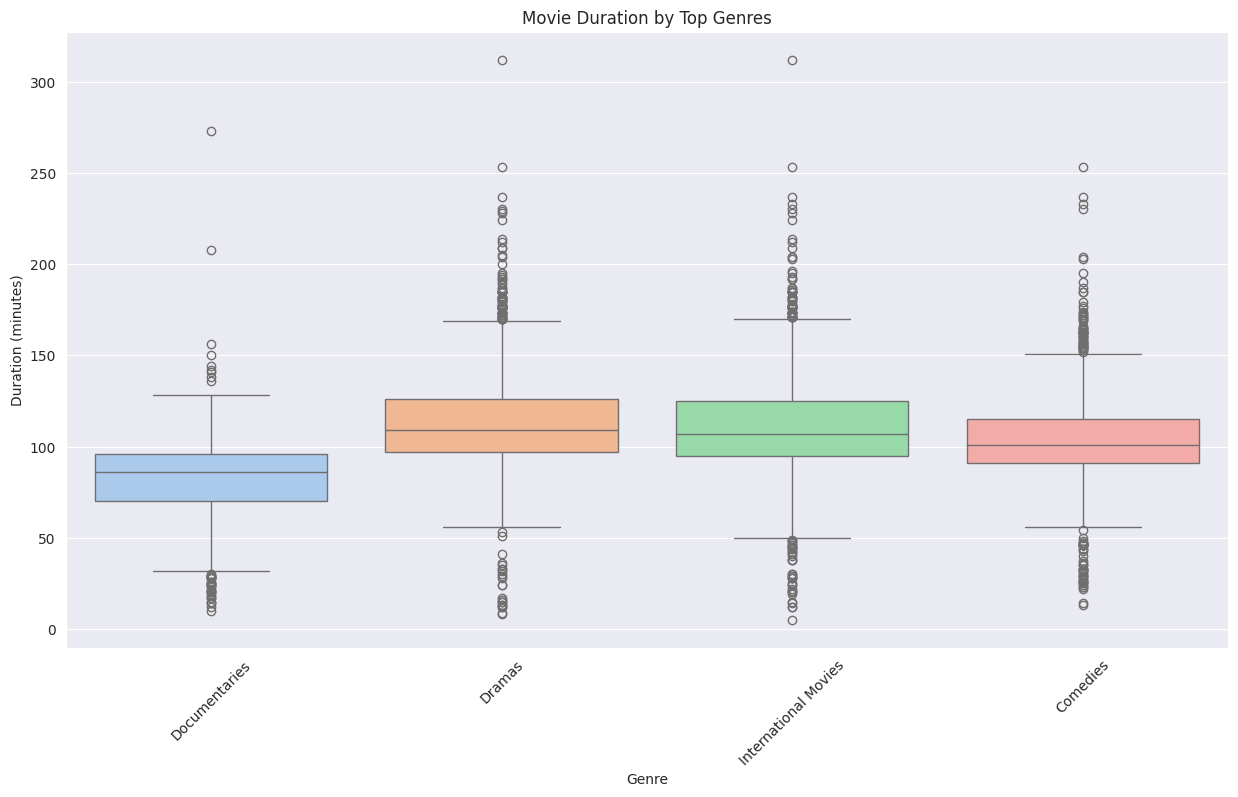

In [41]:
# Analyze movie duration across different top genres
top_genres = genres['genre'].value_counts().index[:5]
genres_movies = genres[(genres['type'] == 'Movie') & (genres['genre'].isin(top_genres))].copy()
genres_movies['duration_min'] = genres_movies['duration'].str.replace(' min', '').astype(int)

plt.figure(figsize=(15, 8))
sns.boxplot(data=genres_movies, x='genre', y='duration_min', palette='pastel', hue='genre', legend=False)
plt.title('Movie Duration by Top Genres')
plt.xlabel('Genre')
plt.ylabel('Duration (minutes)')
plt.xticks(rotation=45)
plt.show()

In [42]:
text = ' '.join(df['description'])

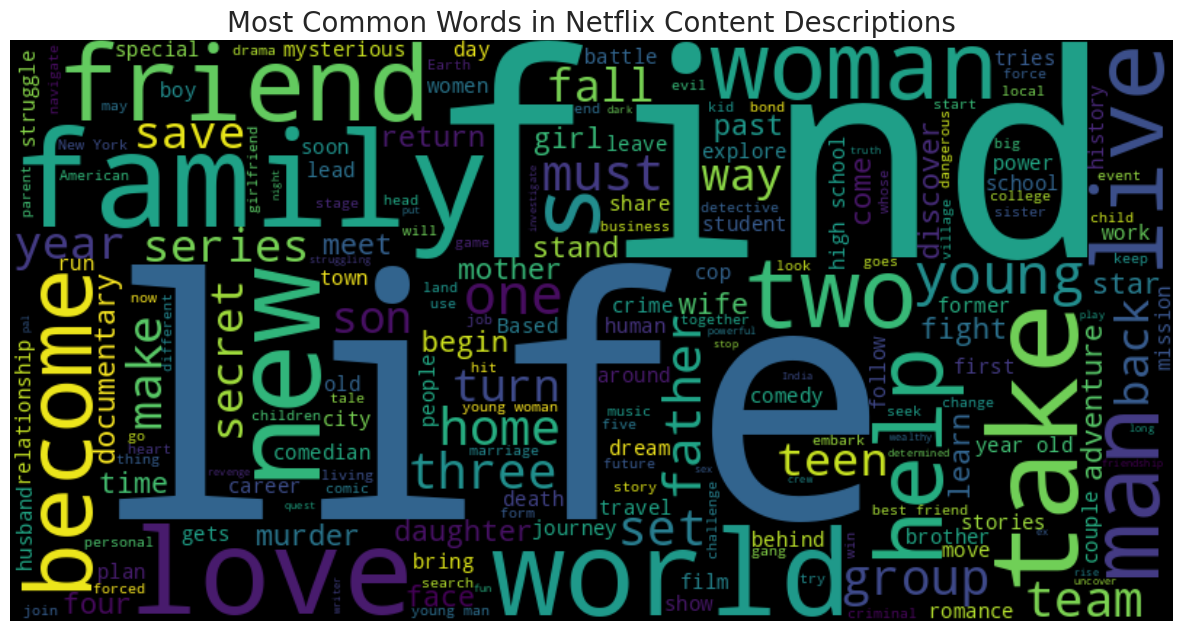

In [43]:
## Generating the visual
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)

# Display the generated image
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Netflix Content Descriptions', fontsize=20)
plt.show()

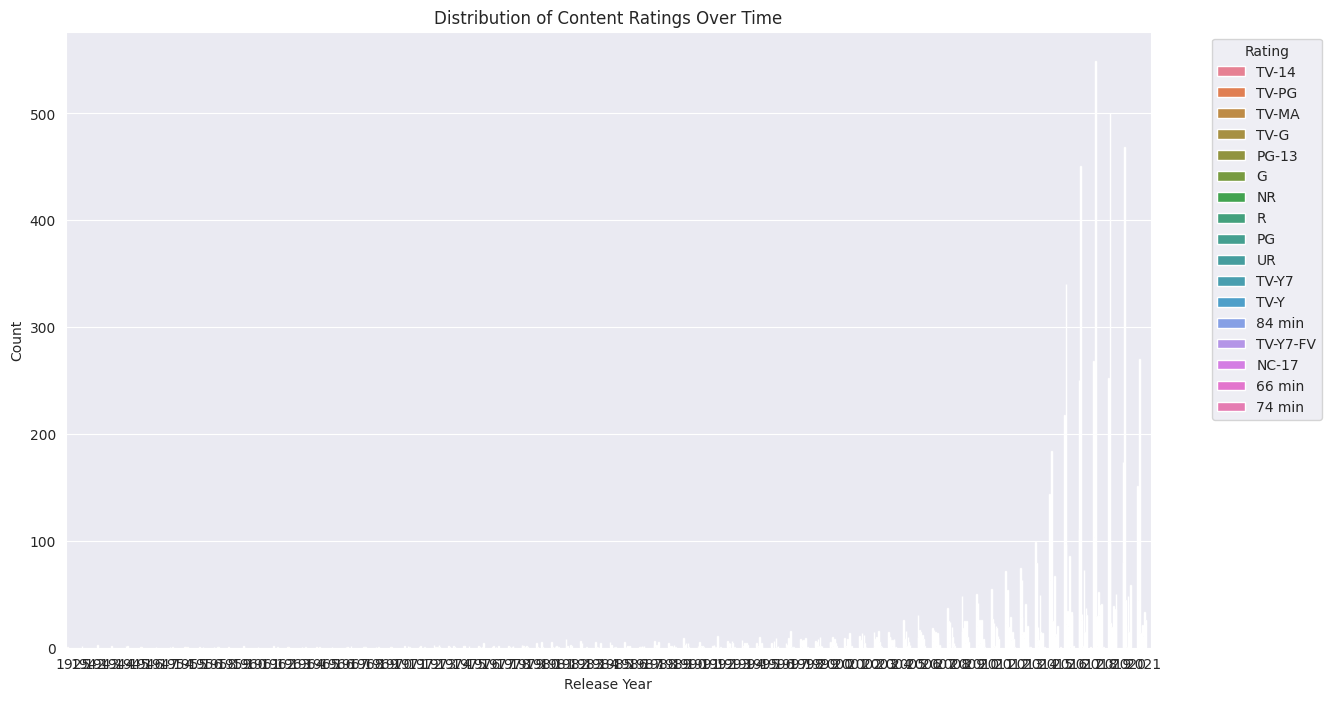

In [44]:
plt.figure(figsize=(14, 8))
sns.countplot(data=df, x='release_year', hue='rating', order=sorted(df['release_year'].unique()))
plt.title('Distribution of Content Ratings Over Time')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.legend(title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

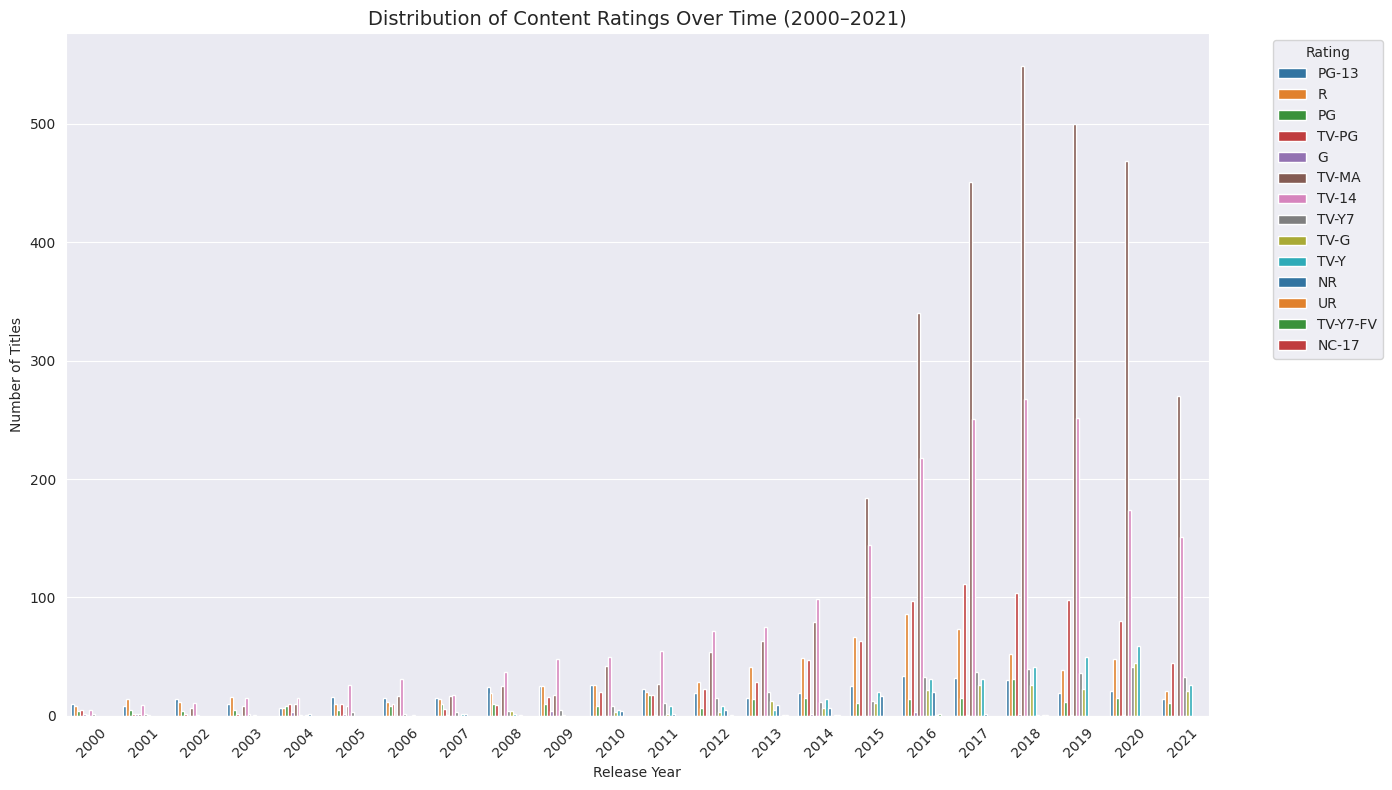

In [45]:
df['rating'] = df['rating'].replace(['84 min', '74 min', '66 min'], pd.NA)

# Remove rows with missing or invalid ratings
ratings_df = df.dropna(subset=['rating', 'release_year'])

# Keep only years after 2000 for better visibility
ratings_df = ratings_df[ratings_df['release_year'] >= 2000]

plt.figure(figsize=(14, 8))
sns.countplot(data=ratings_df, x='release_year', hue='rating', palette='tab10')
plt.title('Distribution of Content Ratings Over Time (2000–2021)', fontsize=14)
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.legend(title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

/tmp/ipython-input-2094178606.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='type', y='age_on_netflix', palette='Set2')


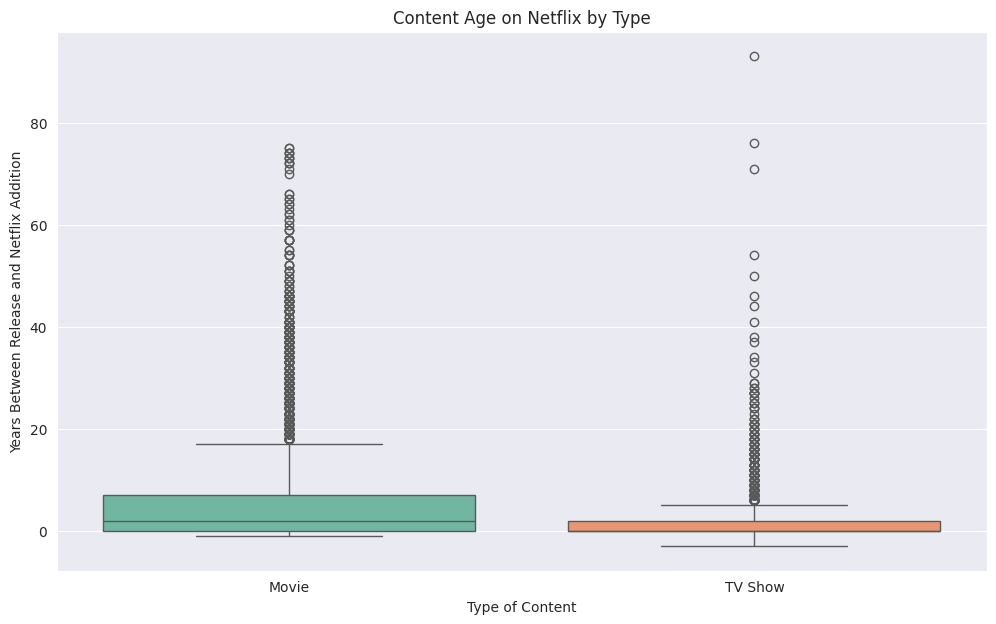

In [46]:
df['age_on_netflix'] = df['date_added'].dt.year - df['release_year']

plt.figure(figsize=(12, 7))
sns.boxplot(data=df, x='type', y='age_on_netflix', palette='Set2')
plt.title('Content Age on Netflix by Type')
plt.xlabel('Type of Content')
plt.ylabel('Years Between Release and Netflix Addition')
plt.show()

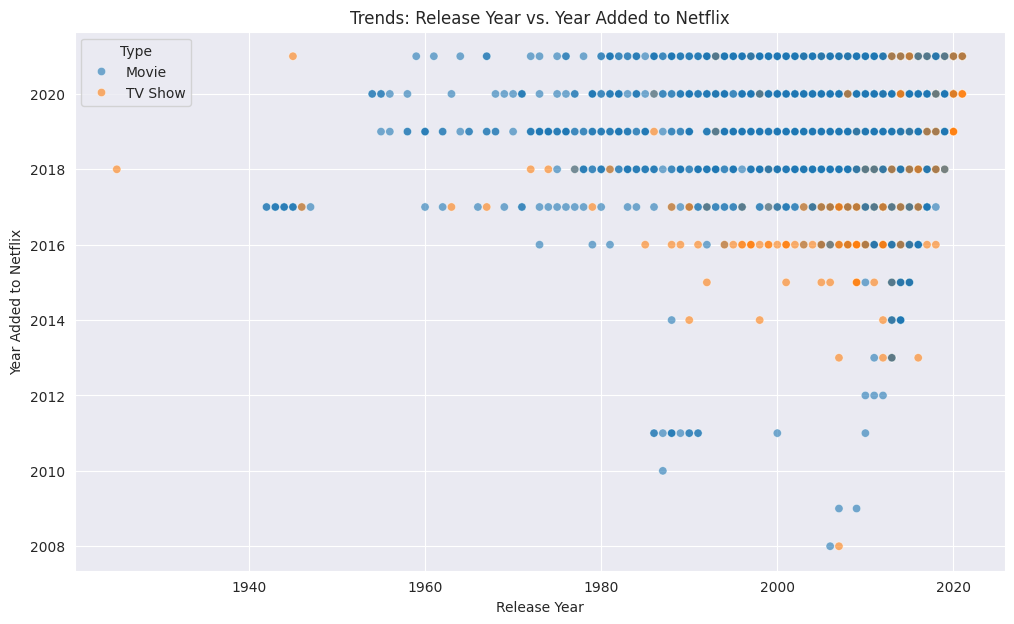

In [47]:
plt.figure(figsize=(12, 7))
sns.scatterplot(data=df, x='release_year', y=df['date_added'].dt.year, hue='type', alpha=0.6)
plt.title('Trends: Release Year vs. Year Added to Netflix')
plt.xlabel('Release Year')
plt.ylabel('Year Added to Netflix')
plt.legend(title='Type')
plt.show()

/tmp/ipython-input-3043158436.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Bigram', x='Count', data=bigram_df, palette='mako')


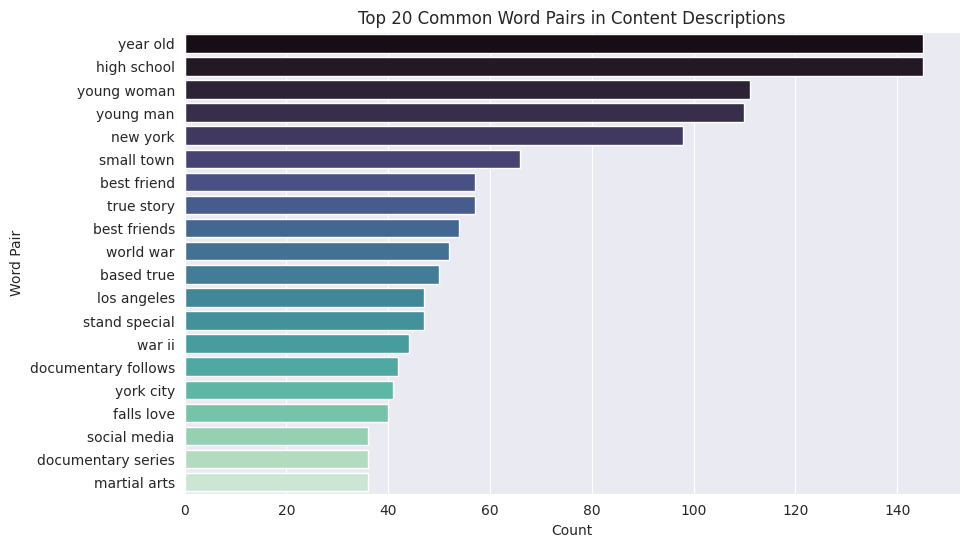

In [50]:
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter

# Create bigrams (two-word combinations)
vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words='english')
bigrams = vectorizer.fit_transform(df['description'].dropna())

# Count and display top 20
sum_words = bigrams.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
sorted_words = sorted(words_freq, key=lambda x: x[1], reverse=True)[:20]

bigram_df = pd.DataFrame(sorted_words, columns=['Bigram', 'Count'])

plt.figure(figsize=(10, 6))
sns.barplot(y='Bigram', x='Count', data=bigram_df, palette='mako')
plt.title('Top 20 Common Word Pairs in Content Descriptions')
plt.xlabel('Count')
plt.ylabel('Word Pair')
plt.show()

/tmp/ipython-input-3494218661.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_directors.values, y=top_directors.index, palette='viridis')


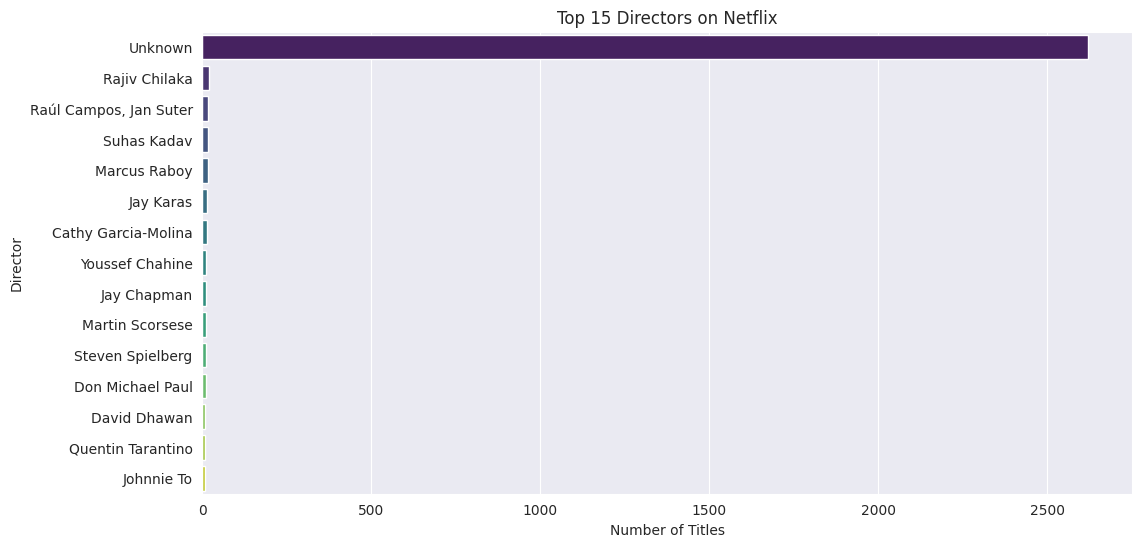

In [51]:
top_directors = df['director'].value_counts().dropna().head(15)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_directors.values, y=top_directors.index, palette='viridis')
plt.title('Top 15 Directors on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.show()